## Imports

In [559]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Reading Data

In [560]:
df_segmentation = pd.read_csv('data_kmeans_pca.csv', index_col = 0)
df_segmentation.head()

,Gender,Marital_status,Age,Education,Income,Occupation,Settlement_size
ID,,,,,,,
522,1,0,67,2,50820,0,1
738,0,1,69,1,34321,0,0
741,1,1,55,1,43955,1,1
661,0,1,62,2,58171,1,0
412,1,1,39,3,71124,1,0


Text(0.5, 1.0, 'Visualization of raw data')

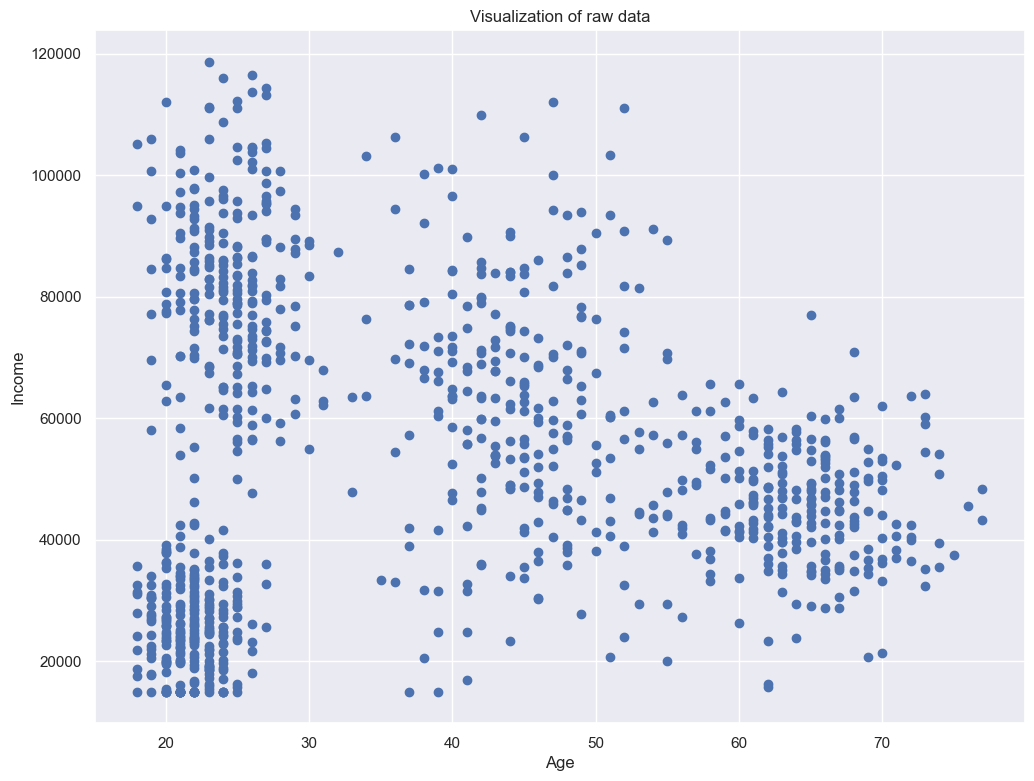

In [562]:
#visualize raw data
plt.figure(figsize=(12,9))
plt.scatter(df_segmentation.iloc[:,2], df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

## StandardScaler

In [563]:
#standarization
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

## Principal Component Analysis

In [564]:
#dimensionality reduction
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [565]:
#the attribute shows how mush variance is explained by each component
pca.explained_variance_ratio_

array([0.21536085, 0.16731453, 0.14784246, 0.14153559, 0.13771645,
       0.10661333, 0.0836168 ])

Text(0, 0.5, 'Cumulative explained variance')

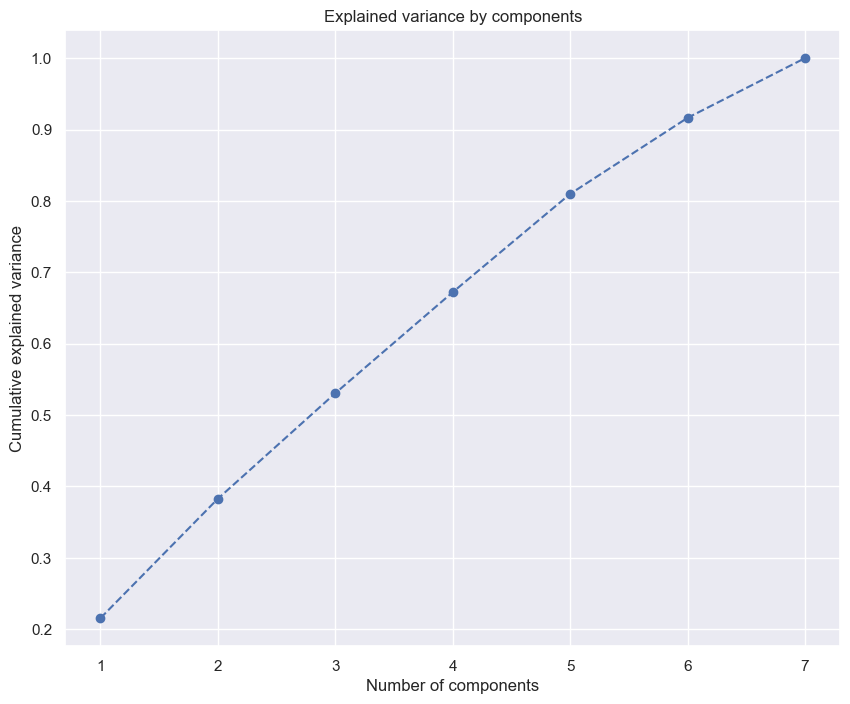

In [566]:
plt.figure(figsize=(10,8))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [567]:
pca = PCA(n_components=4)

In [568]:
pca.fit(segmentation_std)

PCA(n_components=4)

In [569]:
pca.transform(segmentation_std)

array([[-2.71609946e-01, -1.00737597e+00,  1.03284862e+00,
        -3.75818153e-01],
       [ 1.08120582e+00, -1.72764773e+00, -3.93104514e-01,
        -1.93464566e+00],
       [ 1.68103490e+00, -3.17255049e-01,  4.78338458e-01,
        -1.07141726e+00],
       ...,
       [-1.80763372e+00, -1.38307776e+00, -1.76698977e+00,
        -5.85566326e-01],
       [ 1.33274072e+00, -3.69790314e-04,  2.64433341e-01,
         7.58231606e-01],
       [-1.31083599e+00,  1.34275932e+00, -1.35893077e+00,
         3.38702480e-01]])

In [570]:
scores_pca = pca.transform(segmentation_std)

## Elbow Method

In [571]:
inertias = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scores_pca)
    inertias.append(kmeans.inertia_)
    

Text(0.5, 1.0, 'K-means clustering')

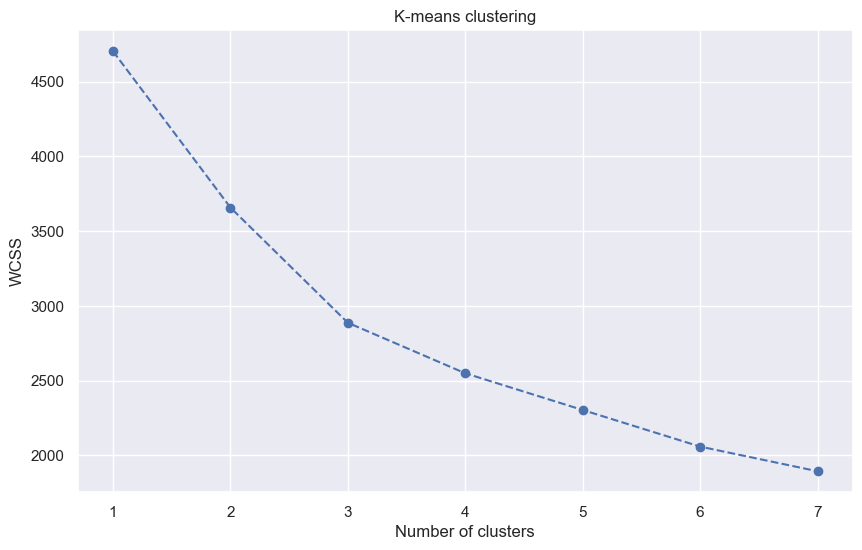

In [572]:
plt.figure(figsize=(10,6))
plt.plot(range(1,8), inertias, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-means clustering')

## KMeans Clustering

In [573]:
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)

In [574]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

In [575]:
#kmenas clustering with PCA results
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-4: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
#the last column we add contains the pca k-menas clustering labels
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_


In [576]:
df_segm_pca_kmeans.head()

,Gender,Marital_status,Age,Education,Income,Occupation,Settlement_size,Component 1,Component 2,Component 3,Component 4,Segment K-means PCA
0,1,0,67,2,50820,0,1,-0.271610,-1.007376,1.032849,-0.375818,1
1,0,1,69,1,34321,0,0,1.081206,-1.727648,-0.393105,-1.934646,2
2,1,1,55,1,43955,1,1,1.681035,-0.317255,0.478338,-1.071417,2
3,0,1,62,2,58171,1,0,1.769032,-0.008970,0.111434,-0.252381,2
4,1,1,39,3,71124,1,0,0.920445,0.935825,1.857882,0.426456,2


In [577]:
df_segm_pca_kmeans["Segment"] = df_segm_pca_kmeans["Segment K-means PCA"].map({0:'first', 1:'second', 2:'third', 3:'fourth'})

## Visualize clusters

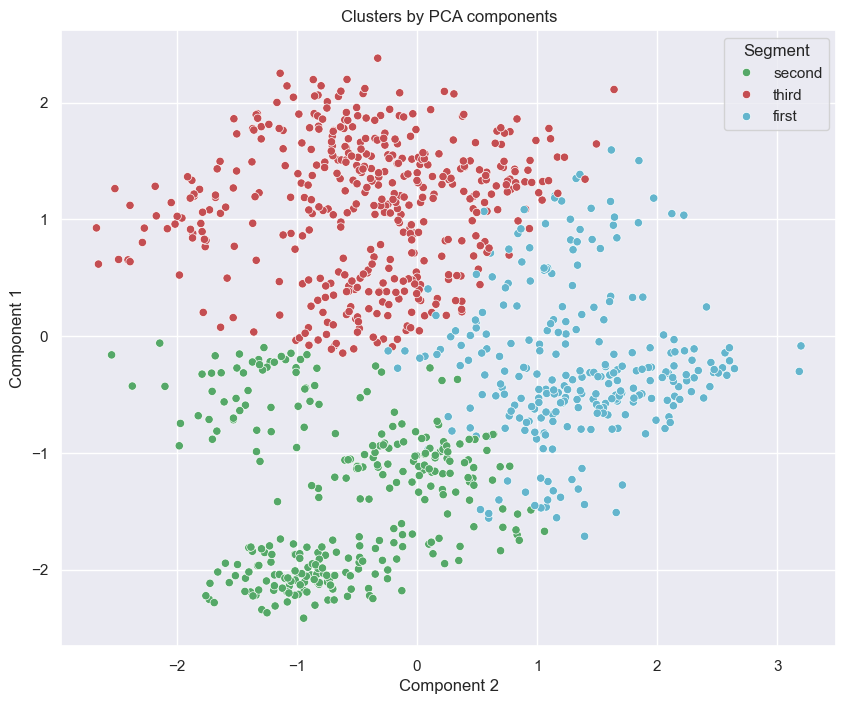

In [578]:
# plot data by pca components .the y axis is the first component and the x axis is the second component
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot( x=x_axis, y=y_axis, hue=df_segm_pca_kmeans["Segment"], palette=['g', 'r', 'c'])
plt.title('Clusters by PCA components') 
plt.show()